# Exploring Data - The Traditional Way !

## What is a typical Workflow for solving data science competitions?

The competition solution workflow goes through seven stages described in the Data Science Solutions book. I will keep the explanation brief as I loathe long as hell notebooks!

* Define the problem
* Gather training and testing data.
* Data Cleansing 
* Analysing and Exploring the data
* Model, predict and solve the problem.
* Visualize, report, and present the problem solving steps and final solution.
* Submit the results, Yay!

## STEP 1: Figuring out the what the question/ problem needs
Our example is the Titanic Competition from Kaggle, it is a learning competition and definitely worth trying out!
Inferred Problem statement : 
***
Given: a training set of samples listing passengers with a column denoting who survived or did not survive the Titanic disaster. 

Goal: Can our model, based on a given test dataset not containing the survival information, determine whether they survived or not. 
***

### Let's Get STARTED!

In [134]:
# For data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy import interp
import math
from scipy.stats import norm
from scipy import stats

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Models, though we may not be using them in this notebook, just to give an idea
from sklearn.linear_model import LogisticRegression
#...

## Step 2: Gathering Data

In [135]:
train = pd.read_csv('C:/Users/HP/Downloads/train.csv')
test = pd.read_csv('C:/Users/HP/Downloads/test.csv')

#Now you can't apply changes to train dataset and leave the test set alone!
data = [train, test]

### Alright, time to peep into them!
Let us take a look at the features that are available inside, to check for those we need or those incomplete.

In [136]:
print(train.columns.values)
train.head()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we can **OBSERVE** that:

**Categorical features:**
* **Survived:** Indicates that if particular passenger survived(1) or not(0)
* **Pclass:** Shows classes for the passenger, 1 for first, 2 for second and 3 for third.
* **Sex:** Indicates gender of the passenger. Might be crucial indicator for our model since historical records show women were first to save in ship accidents.
* **SibSp:** The number of siblings and spouses on the ship, might be useful for extracting family ties.
* **Parch:** The number of parents and children on the ship, migt have similar use with SibSp.
* **Embarked:** Flag for the where the passenger embarked from, C for Cherbourg, Q for Queenstown, S for Southampton

**Continuous Numerical features:**
* **Age**: Well an obvious feature that indicates age of the passenger.
* **Fare:** Again obvious one that shows amount of the money spent on the ticket.

**Alpha-numeric:**
* **Cabin**
* **Ticket**


In [137]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

## **Null values:**

Clearly, **Cabin> Age> Embarked** have null values and are the **incomplete data set** that needs to be taken care of

### Distribution of feature values across the samples:
**Numeric:**

In [138]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Totally, there are 891 passengers on board the Titanic.
* 'Survived' is a two-category feature with 0 or 1 for value.
* Around 38% survived.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.

**categorical features:**

In [139]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Glynn, Miss. Mary Agatha",male,1601,G6,S
freq,1,577,7,4,644


* There are 891 unique names.
* Sex variable has two possible values with a majority of male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Essentially, several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S).
* Ticket feature has high ratio of duplicate values too (unique=681).

## Step 2: Data Cleansing and Analysis
 These two go hand in hand infact. 
 ## Correlate!
 Let us begin with analyzing how each feature is related to the 'Survived' class by pivoting them against each other.
 
**SEX :**
We have a clear majority, women (almost 75%) survived the titanic! Is it because Women and children first?

In [140]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**Pclass:** Again clearly, the more you pay the more important you are!

In [141]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**SibSp and Parch:** These features have zero correlation for certain values. It is best we derive a feature or a set of features from these individual features

In [142]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [143]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### Alright time for some graphs!

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. 

**AGE:**

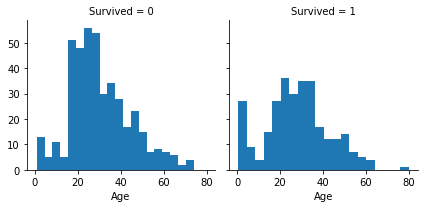

In [144]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

Hence we will complete the Age feature for null values and band age groups!

**PCLASS:**

c:\users\hp\python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


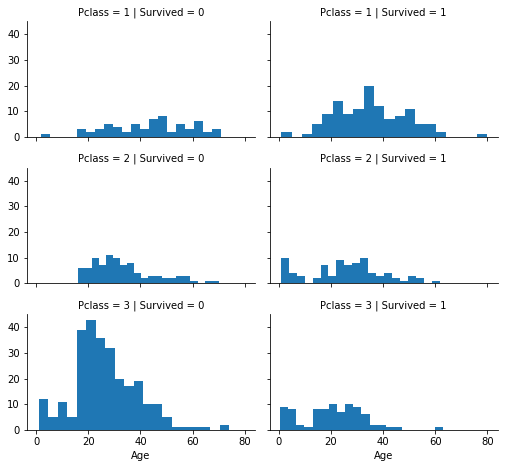

In [145]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

* Pclass=3 had most passengers, however most did not survive.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived.
* Most passengers in Pclass=1 survived.
* Pclass varies in terms of Age distribution of passengers.

### correlating categorical features
**Embarked and SEX:**

c:\users\hp\python\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\hp\python\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


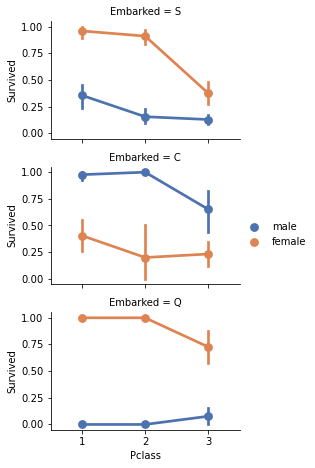

In [146]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

* Female passengers had much better survival rate than males.
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

**correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric)**

c:\users\hp\python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\hp\python\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


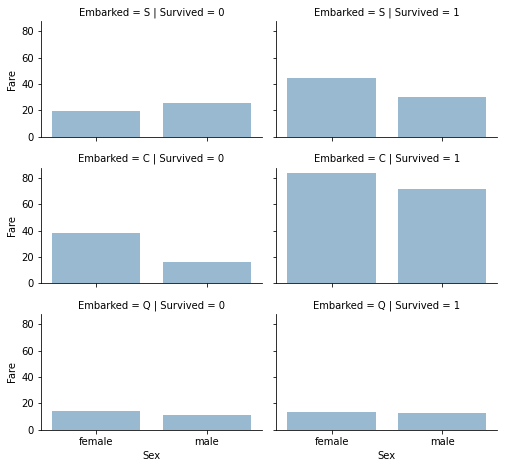

In [147]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

* Higher fare paying passengers had better survival.
* Port of embarkation correlates with survival rates.

## Correct the features!
 **1. By dropping**

In [148]:
print("Before dropping: ", train.shape, test.shape, data[0].shape, data[1].shape)
train = train.drop(['Ticket', 'Cabin'], axis=1)
data= [train,test]
"After Dropping:", train.shape, test.shape, data[0].shape, data[1].shape

Before dropping:  (891, 12) (418, 11) (891, 12) (418, 11)


('After Dropping:', (891, 10), (418, 9), (891, 10), (418, 9))

**2. By Feature extracting**
we plot Title, Age, and Survived

In [149]:
for dataset in data:
    # The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature.
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [150]:
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


* Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
* Survival among Title Age bands varies slightly.
* Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

In [151]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


**Dropping Name feature now**


In [152]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
data = [train, test]
train.shape, test.shape


((891, 9), (418, 9))

**Converting Sex to 1 for female and 0 for male**

In [153]:
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


**Completing age continuous feature**

An accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...



c:\users\hp\python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


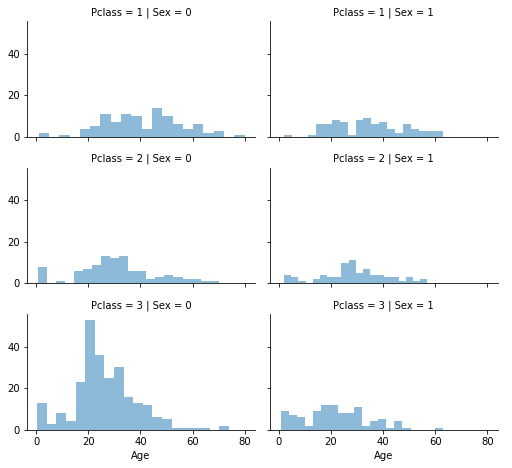

In [154]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [155]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [156]:
for dataset in data:
    for i in range(0, 2):
        for j in range(0, 3):
            guess = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create **Age bands** and determine correlations with Survived.

and replace Age with ordinals based on these bands

In [157]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [158]:
for dataset in data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [159]:
train = train.drop(['AgeBand'], axis=1)
data = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


**A new feature for FamilySize which combines Parch and SibSp**

In [160]:
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [161]:
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [162]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
data = [train, test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [163]:
for dataset in data:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


**Completing Embarked feature**

In [164]:
freq_port = train.Embarked.dropna().mode()[0]
print(freq_port)
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


S


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [165]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


**Now completing and converting Fare feature**

completing the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code

In [166]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


Creating **Fare Band**

In [167]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the **FareBand**.

In [168]:
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train = train.drop(['FareBand'], axis=1)
data = [train, test]
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [169]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## We are all SET!

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

## Let us try approximate modelling

In [170]:
import pandas as pd
from pycaret.classification import create_model,setup
from pycaret import classification

In [172]:
classification_setup = setup(data= train, target='Survived',remove_outliers=True,normalize=True,normalize_method='minmax')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8010
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 9)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [173]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.818100,0.843400,0.698000,0.814700,0.748800,0.607800
1,Extreme Gradient Boosting,0.813000,0.841000,0.702200,0.799800,0.744600,0.598300
2,Light Gradient Boosting Machine,0.813000,0.852800,0.698000,0.801800,0.743500,0.597800
3,Extra Trees Classifier,0.804600,0.826500,0.672100,0.800900,0.728600,0.577800
4,Logistic Regression,0.802900,0.837300,0.667800,0.807800,0.725600,0.574000
5,Gradient Boosting Classifier,0.801200,0.849800,0.654300,0.805500,0.717700,0.567300
6,K Neighbors Classifier,0.801100,0.826400,0.676300,0.789700,0.726100,0.571600
7,Decision Tree Classifier,0.799500,0.816200,0.667900,0.790400,0.722200,0.567200
8,Random Forest Classifier,0.794500,0.835300,0.698000,0.763700,0.726700,0.562600
9,Ridge Classifier,0.787800,0.000000,0.676400,0.762700,0.712300,0.545600


In [174]:
rc = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9167,0.9242,0.8261,0.9500,0.8837,0.8193
1,0.7500,0.7914,0.6087,0.7000,0.6512,0.4578
2,0.8333,0.9138,0.7917,0.7917,0.7917,0.6528
3,0.8500,0.8443,0.6667,0.9412,0.7805,0.6715
4,0.8644,0.9034,0.8261,0.8261,0.8261,0.7150
5,0.7797,0.8134,0.6087,0.7778,0.6829,0.5179
6,0.8136,0.8237,0.6087,0.8750,0.7179,0.5853
7,0.8136,0.8092,0.6957,0.8000,0.7442,0.5986
8,0.7627,0.7675,0.6957,0.6957,0.6957,0.5012
9,0.7966,0.8436,0.6522,0.7895,0.7143,0.5586


In [175]:
pred = classification.predict_model(rc, data = test)